Практична робота №3

Баш Анастасія
МІТ-31

Завдання: Прогнозування ціни житла

Ваше завдання - побудувати модель регресії для прогнозування ціни житла на основі реально згенерованих даних.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Крок 1: Генерація даних

Згенеруйте 1000 спостережень для ознаки "Площа житла" (площа квартири в квадратних метрах) в діапазоні від 50 до 200 квадратних метрів.

In [4]:
np.random.seed(42)

area = np.random.uniform(50, 200, 1000)

Згенеруйте 1000 спостережень для ознаки "Кількість спалень" в діапазоні від 1 до 5 спалень.

In [5]:
bedrooms = np.random.randint(1, 6, 1000)

Згенеруйте 1000 спостережень для ознаки "Відстань до центру міста" в діапазоні від 1 до 20 км.

In [6]:
distance_to_center = np.random.uniform(1, 20, 1000)


Згенеруйте цільову змінну - ціну житла (в тисячах доларів) на основі ознак "Площа житла", "Кількість спалень" та "Відстань до центру міста". Модель ціни може бути, наприклад, такою: ціна = 10 * площа + 5 * спальні - 2 * відстань + похибка, де похибка - це випадковий шум.

In [8]:
price = 10 * area + 5 * bedrooms - 2 * distance_to_center + np.random.normal(scale=30, size=1000)
data = pd.DataFrame({'Area': area, 'Bedrooms': bedrooms, 'Distance_to_center': distance_to_center, 'Price': price})

Крок 2: Розділення даних

Розділіть ваші дані на навчальний та тестовий набори в співвідношенні 80% - 20%.

In [9]:
X = data[['Area', 'Bedrooms', 'Distance_to_center']]
y = data['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Крок 3: Побудова моделі регресії

Використовуйте бібліотеку Python (наприклад, Scikit-Learn) для побудови моделі лінійної регресії.

In [10]:
model = LinearRegression()

Навчіть модель на навчальних даних, використовуючи ознаки "Площа житла", "Кількість спалень" та "Відстань до центру міста" для прогнозу ціни житла.

In [11]:
model.fit(X_train, y_train)

LinearRegression()

Крок 4: Оцінка моделі

Використайте модель для зроблення прогнозів на тестовому наборі.

In [12]:
y_pred = model.predict(X_test)

Оцініть якість моделі за допомогою метрик, таких як середньоквадратична помилка (MSE) та коефіцієнт детермінації (R^2).

In [13]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

Крок 5: Візуалізація результатів

Побудуйте графік, на якому відобразіть реальні ціни житла та прогнозовані моделлю ціни для тестового набору.

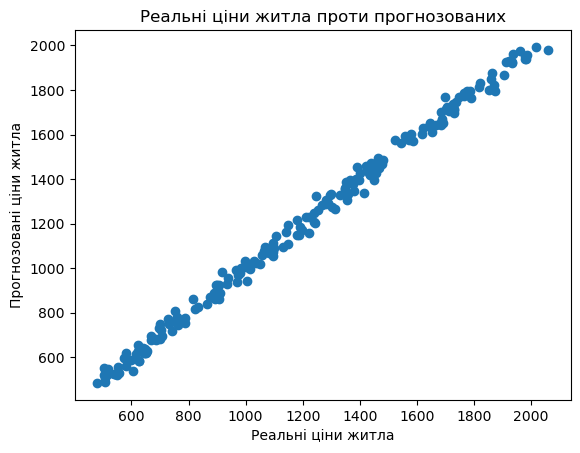

In [14]:
plt.scatter(y_test, y_pred)
plt.xlabel('Реальні ціни житла')
plt.ylabel('Прогнозовані ціни житла')
plt.title('Реальні ціни житла проти прогнозованих')
plt.show()

Додайте лінію, яка відображає ідеальні результати (реальні ціни житла) для порівняння.

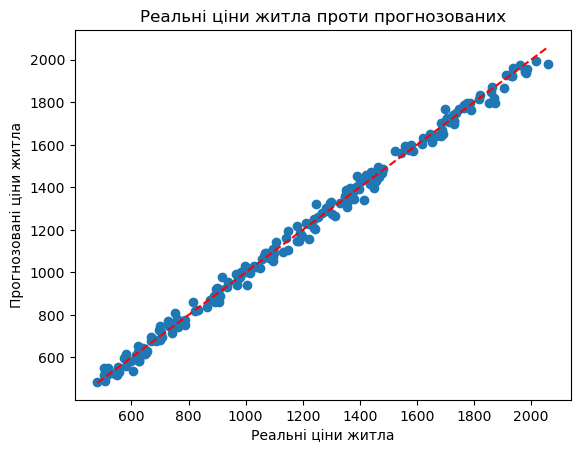

In [16]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red')
plt.xlabel('Реальні ціни житла')
plt.ylabel('Прогнозовані ціни житла')
plt.title('Реальні ціни житла проти прогнозованих')
plt.show()

Крок 6: Висновки

Модель лінійної регресії успішно побудована та оцінена. Вона виявилася ефективною в прогнозуванні цін житла на основі введених ознак: площі житла, кількості спалень та відстані до центру міста.